# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


In [112]:
#Importing Required Packages
import re
from collections import Counter
import pandas as pd
import numpy as np
import spacy
nlp = spacy.load("en_core_web_sm")
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
#Importing Data
data=pd.read_csv('/content/movie_reviews.csv')
#Displaying first five observations of the data
data.head()

,Raw Reviews,Cleaned Reviews
0,One of the most anticipated films of the year ...,one anticipated film year many people included...
1,You'll have to have your wits about you and yo...,youll wit brain fully switched watching oppenh...
2,I'm a big fan of Nolan's work so was really lo...,im big fan nolans work really looking forward ...
3,"""Oppenheimer"" is a biographical thriller film ...",oppenheimer biographical thriller film written...
4,This movie is just... wow! I don't think I hav...,movie wow dont think ever felt like watching m...


In [39]:
#Converting the cleansed review column into a list with name 'reviews'
reviews=list(data['Cleaned Reviews'])

## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [81]:
#Count the frequency of all the N-grams (N=3).
#Breaking each review into tokens using regular expressions
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())
#Generating trigrams (i.e.) Dividing a sentence into group of 3 words starting from each words postion
#followed by next two consecutive words
def generate_trigrams(tokens):
    trigrams = []
    for i in range(len(tokens) - 2):
        trigrams.append((tokens[i], tokens[i+1], tokens[i+2]))
    return trigrams

#Defining a list to append trigrams
trigrams = []
for review in reviews:
    tokens = tokenize(review)
    trigrams.extend(generate_trigrams(tokens))
# Count the frequency of all the trigrams
trigram_counts = Counter(trigrams)


In [86]:
#Calculate the probabilities for all the bigrams in the dataset by using the fomular
#count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.
from collections import Counter
#function to create bigrams
def generate_bigrams(reviews):
    bigrams = []
    for review in reviews:
        words = review.split()
        for i in range(len(words) - 1):
            bigrams.append((words[i], words[i+1]))
    return bigrams
#function to calculate the bigram probability
def calculate_bigram_probability(bigrams):
    bigram_counts = Counter(bigrams)
    total_bigrams = sum(bigram_counts.values())
    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        bigram_probabilities[bigram] = count / total_bigrams
    return bigram_probabilities

bigrams = generate_bigrams(reviews)
bigram_probabilities = calculate_bigram_probability(bigrams)

# Print the bigrams and their probabilities
for bigram, probability in bigram_probabilities.items():
    print(f"Bigram: {bigram}, Probability: {probability}")

Bigram: ('one', 'anticipated'), Probability: 0.00021496130696474635
Bigram: ('anticipated', 'film'), Probability: 0.00021496130696474635
Bigram: ('film', 'year'), Probability: 0.00021496130696474635
Bigram: ('year', 'many'), Probability: 0.00021496130696474635
Bigram: ('many', 'people'), Probability: 0.0006448839208942391
Bigram: ('people', 'included'), Probability: 0.00021496130696474635
Bigram: ('included', 'oppenheimer'), Probability: 0.00021496130696474635
Bigram: ('oppenheimer', 'largely'), Probability: 0.00021496130696474635
Bigram: ('largely', 'delivers'), Probability: 0.00021496130696474635
Bigram: ('delivers', 'much'), Probability: 0.00021496130696474635
Bigram: ('much', 'great'), Probability: 0.00021496130696474635
Bigram: ('great', 'feel'), Probability: 0.00021496130696474635
Bigram: ('feel', 'like'), Probability: 0.0006448839208942391
Bigram: ('like', 'loved'), Probability: 0.00021496130696474635
Bigram: ('loved', 'two'), Probability: 0.00021496130696474635
Bigram: ('two', 

In [89]:
#Extract all the noun phrases and calculate the relative probabilities of each review
#in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase)
#/ max frequency (noun phrase) on the whole dataset. Print out the result in a table
#with column name the all the noun phrases and row name as all the 100 reviews
#(abstracts, or tweets).
def extract_noun_phrases(text):
    """
    Extract noun phrases from a given text using spaCy.
    """
    doc = nlp(text)
    noun_phrases = [chunk.text for chunk in doc.noun_chunks]
    return noun_phrases

def calculate_relative_probabilities(reviews):
    """
    Calculate relative probabilities of noun phrases in the reviews.
    """
    all_noun_phrases = []

    # Extract noun phrases from all reviews
    for review in reviews:
        noun_phrases = extract_noun_phrases(review)
        all_noun_phrases.extend(noun_phrases)

    # Count frequency of each noun phrase
    noun_phrase_freq = Counter(all_noun_phrases)

    # Find max frequency of any noun phrase for normalization
    max_freq = max(noun_phrase_freq.values())

    # Calculate relative probabilities
    relative_probabilities = {np: freq / max_freq for np, freq in noun_phrase_freq.items()}

    return relative_probabilities

def create_probability_table(reviews):
    """
    Create a table showing the relative probabilities of noun phrases in each review.
    """
    # Calculate relative probabilities
    relative_probs = calculate_relative_probabilities(reviews)

    # Initialize a dictionary to hold our table data
    table_data = {np: [] for np in relative_probs}

    # Fill in the table data
    for review in reviews:
        noun_phrases = extract_noun_phrases(review)
        review_noun_phrases_freq = Counter(noun_phrases)

        for np in table_data:
            # Calculate relative probability for this review, if noun phrase exists in the review
            if np in review_noun_phrases_freq:
                table_data[np].append(review_noun_phrases_freq[np] / relative_probs[np])
            else:
                table_data[np].append(0)

    # Convert the dictionary to a DataFrame for nicer formatting
    df = pd.DataFrame(table_data, index=[f'Review {i+1}' for i in range(len(reviews))])

    return df

df = create_probability_table(reviews)

In [90]:
df.head()

,many people,oppenheimer,much great feel,entire thing,christopher nolans dunkirk,second watch,one,rush,soon long exhausting filmbut,many way,...,formatwhat opportunity,depiction,u follow event movie,various date point view wonder,shoot color black whitewe,lawrence arabia schindlers list manhattan movie,u relish outstanding cinema,pain glory complex life,meant perfection glare sparkle,shine gold
Review 1,4.333333,3.250,13.0,13.0,13.0,13.0,13.0,13.0,13.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review 2,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review 3,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review 4,0.000000,1.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review 5,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [105]:
import math
Query="'Oppenheimer' captivates with its masterful storytelling, stellar performances, and intense portrayal of historical events, making it a must-watch for fans of Christopher Nolan's work and anyone interested in compelling biographical dramas."
def tokenize(text):
    # Simple tokenizer; in practice, consider removing stopwords and punctuation.
    return text.lower().split()
# Calculate TF (Term Frequency)
def compute_tf(doc):
    tf = {}
    for word in doc:
        if word in tf:
            tf[word] += 1
        else:
            tf[word] = 1
    for word in tf:
        tf[word] = tf[word] / len(doc)
    return tf
# Calculate IDF (Inverse Document Frequency)
def compute_idf(documents):
    N = len(documents)
    idf = {}
    for document in documents:
        for word in set(document):
            if word in idf:
                idf[word] += 1
            else:
                idf[word] = 1

    for word in idf:
        idf[word] = math.log(N / idf[word])
    return idf
# Tokenize reviews
tokenized_reviews = [tokenize(review) for review in reviews]
tokenized_query = tokenize(Query)
# Calculate TF for all documents and the query
tf_docs = [compute_tf(doc) for doc in tokenized_reviews]
tf_query = compute_tf(tokenized_query)
# Calculate IDF
idf = compute_idf(tokenized_reviews)
def compute_tfidf(tf, idf):
    tfidf = {}
    for word, val in tf.items():
        tfidf[word] = val * idf.get(word, 0.0)  # Use 0.0 for terms not in the document
    return tfidf
tfidf_docs = [compute_tfidf(tf, idf) for tf in tf_docs]
tfidf_query = compute_tfidf(tf_query, idf)
print(tfidf_docs)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [106]:
#To rank the documents with respect to query (design a query by yourself, for example,
#"An Outstanding movie with a haunting performance and best character development")
#by using cosine similarity.

#Defining function for cosine similarities
def cosine_similarity(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator
#calling the defined function
cosine_similarities = [cosine_similarity(tfidf_query, doc) for doc in tfidf_docs]
# Rank documents by their cosine similarity scores
ranked_docs = sorted(range(len(cosine_similarities)), key=lambda i: cosine_similarities[i], reverse=True)
#Print five 5 documents in ranked order
for i in ranked_docs[0:5]:
    print(f"Document {i+1} Score: {cosine_similarities[i]}")


Document 16 Score: 0.10594785513612079
Document 41 Score: 0.10594785513612079
Document 66 Score: 0.10594785513612079
Document 91 Score: 0.10594785513612079
Document 116 Score: 0.10594785513612079


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

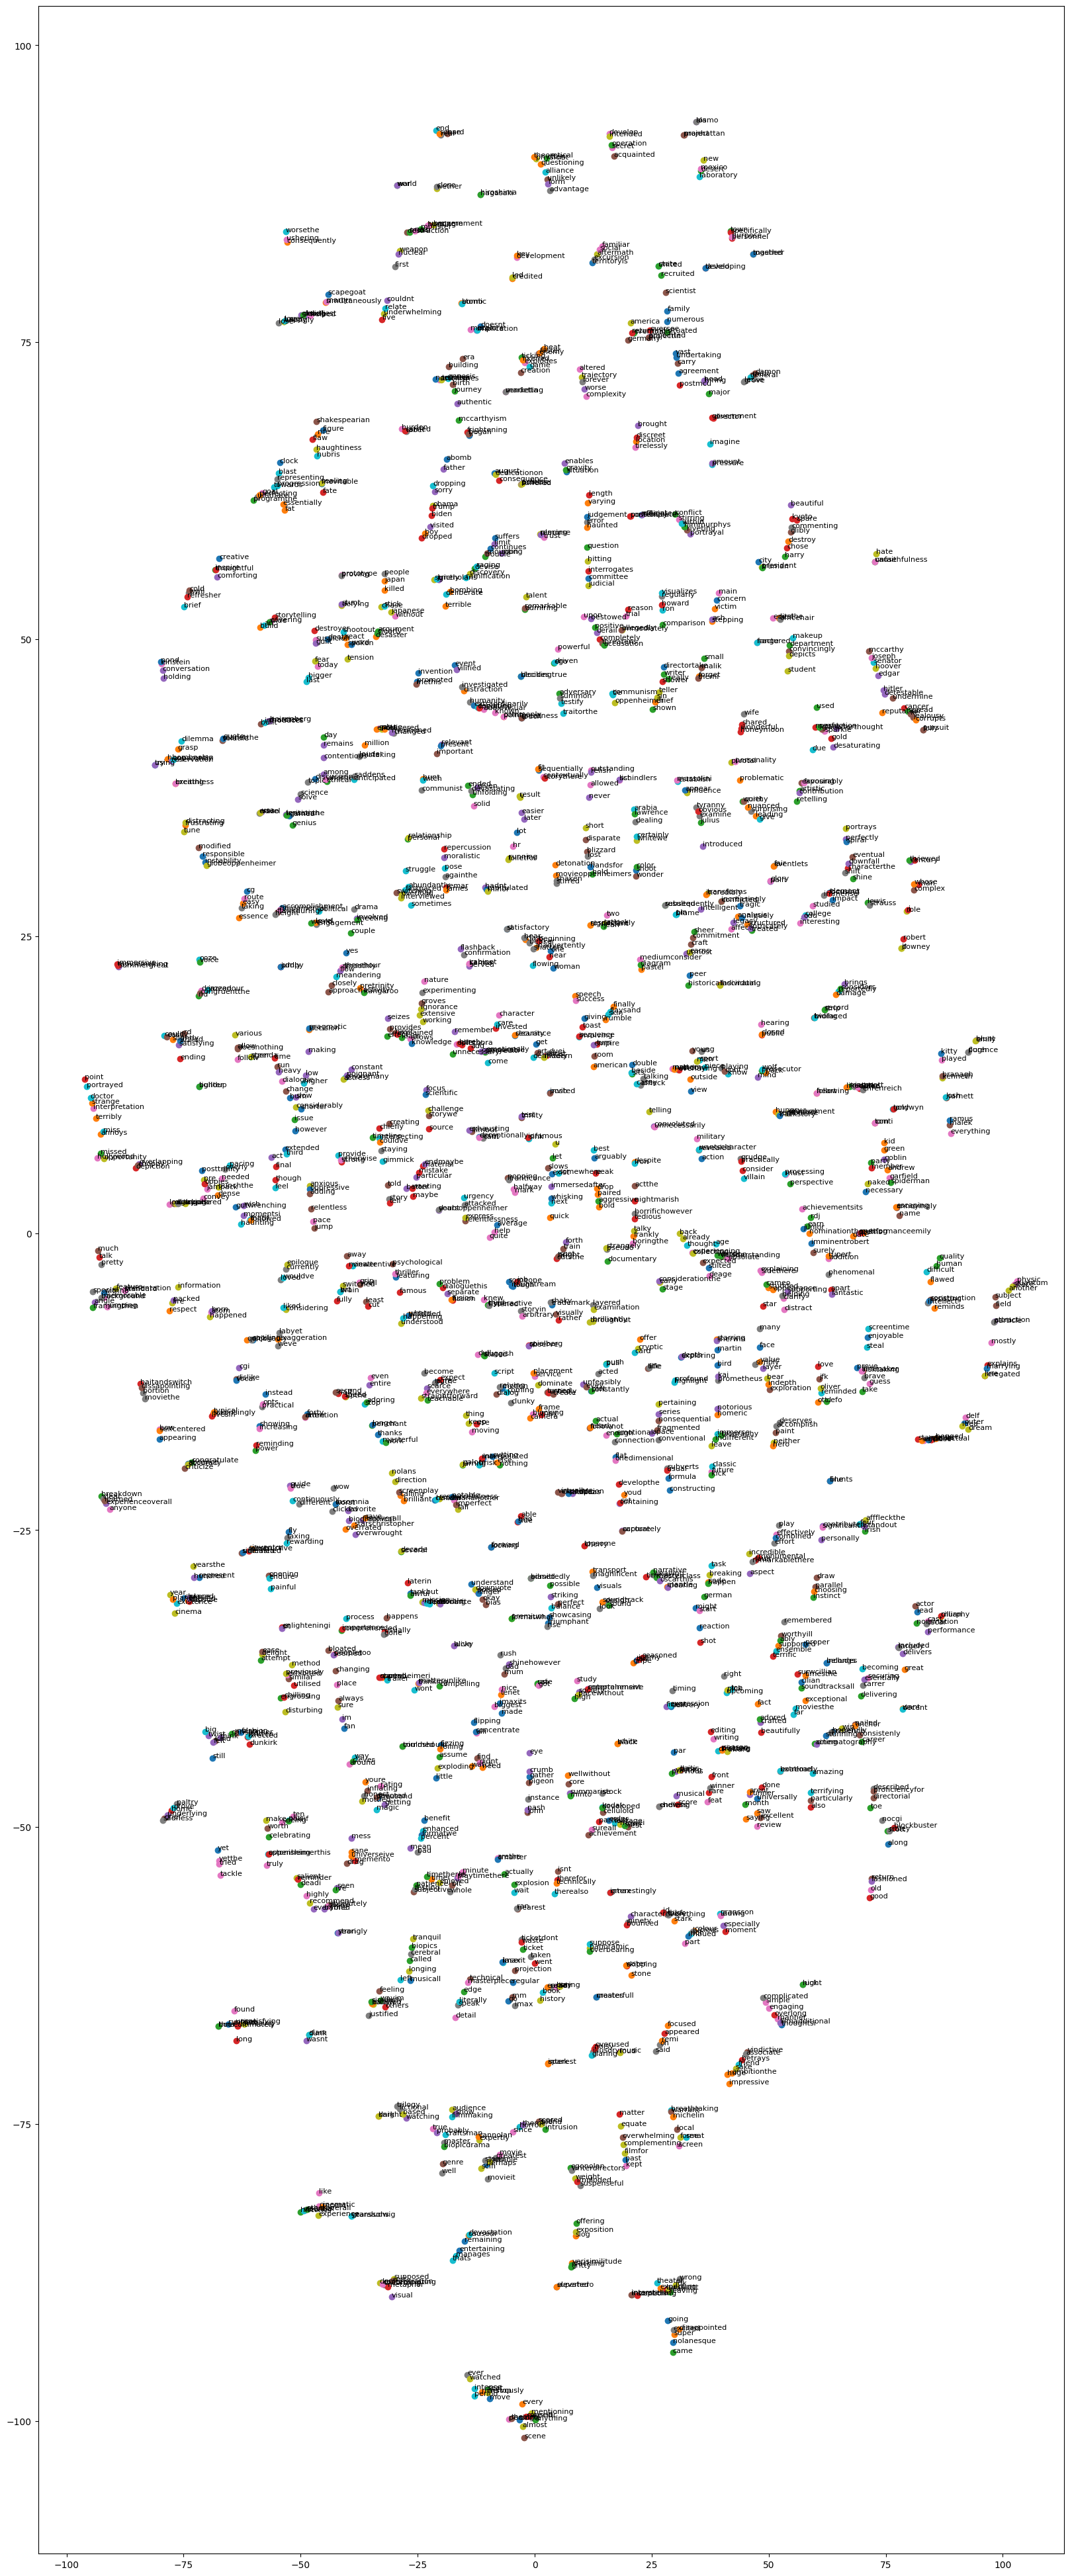

In [117]:
# Preprocess the text data (you may need to modify this based on your preprocessing in Assignment Two)
def preprocess_text(text):
    # Tokenize the text
    words = word_tokenize(text.lower())

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return words

# Apply text preprocessing to each document
tokenized_documents = data['Cleaned Reviews'].apply(preprocess_text)

# Train Word2Vec model
embedding_model = Word2Vec(sentences=tokenized_documents, vector_size=300, window=5, min_count=1, workers=4)

# Save the model for future use if needed
embedding_model.save("word2vec_model.model")

# Visualize the word embeddings using t-SNE
def visualize_word_embeddings(model, documents):
    # Flatten the list of tokenized documents
    flattened_words = [word for doc in documents for word in doc]

    # Extract unique words to visualize
    unique_words = list(set(flattened_words))
    # Filter out words not present in the model's vocabulary
    valid_words = [word for word in unique_words if word in model.wv.key_to_index]
    word_vectors = np.array([model.wv[word] for word in valid_words])

    #word_vectors = np.array([model.wv[word] for word in unique_words])  # Convert to NumPy array

    # Reduce perplexity to a smaller value
    tsne_model = TSNE(n_components=2, perplexity=3, random_state=42)
    word_vectors_2D = tsne_model.fit_transform(word_vectors)

    # Create a DataFrame for visualization
    df = pd.DataFrame(data={'word': unique_words, 'x': word_vectors_2D[:, 0], 'y': word_vectors_2D[:, 1]})


    # Plot the word embeddings
    plt.figure(figsize=(20, 50))
    for i, row in df.iterrows():
        plt.scatter(row['x'], row['y'])
        plt.text(row['x'], row['y'], row['word'], fontsize=8)

    plt.show()

# Visualize word embeddings for some example words
example_words = ['cinema', 'story', 'cast', 'entertaining', 'disappointing']
visualize_word_embeddings(embedding_model, tokenized_documents)

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [127]:
# The GitHub link of your final csv file


# Link:
#https://github.com/VALLURISAIKOUSHIK/INFO-5731/blob/main/movie_reviews_sentiment.csv



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [128]:
#This is assignment is very difficult as we have to develop code from scratch for some question.
#I learnt about n_grams, td-idf, cosine similarity and word embedding models in this assignment.
#I enjoyed the hands on experience with python and the understanding which I gained throughout this
#assignment.